In [2]:
from datasets import load_dataset
dataset = load_dataset("sentence-transformers/eli5")

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 325475
    })
})

In [10]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    # Lowercase and remove punctuation
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords (you can use a library like nltk or sklearn's stop words)
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text


In [ ]:
# Example of preprocessing the data
questions = dataset['train']['question'] # Example data
processed_questions = [preprocess(q) for q in questions]

In [13]:
from sentence_transformers import SentenceTransformer

# Load pre-trained SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the questions into sentence embeddings
question_embeddings = model.encode(processed_questions)

/home/xinmei/.local/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
from sklearn.cluster import KMeans
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Number of clusters (e.g., 3 for Science, History, General)
num_clusters = 3

# Use KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(question_embeddings)  # Use TF-IDF matrix if you're not using embeddings

# Get the cluster labels
labels = kmeans.labels_

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [7]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(labels)

# Print counts for each label
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

Label 1: 145273
Label 0: 69770
Label 2: 110432


/home/xinmei/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/xinmei/.local/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


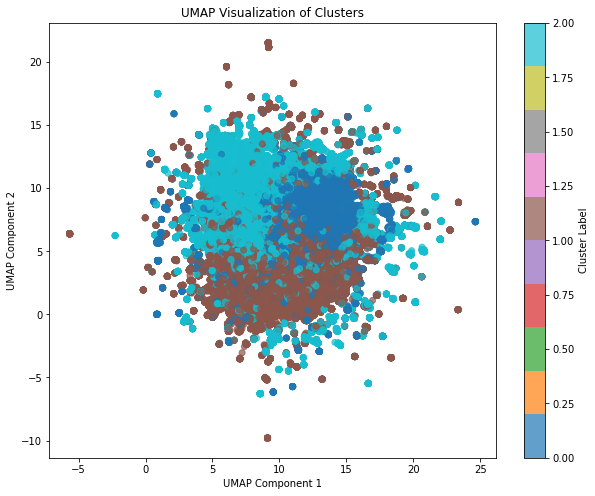

In [6]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(question_embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [14]:
# Create a DataFrame for better handling
import pandas as pd
df = pd.DataFrame({'question': questions, 'label': labels})

# Filter questions with labels=1
label_2_questions = df[df['label'] == 2]

# Save to a CSV file
label_2_questions.to_csv('label_2_questions.csv', index=False)

In [15]:
# Create a DataFrame for better handling
df = pd.DataFrame({'question': questions, 'label': labels})

# Filter questions with labels=1
label_0_questions = df[df['label'] == 0]

# Save to a CSV file
label_0_questions.to_csv('label_0_questions.csv', index=False)

In [16]:
import pandas as pd
df_question=pd.concat([pd.read_csv('label_2_questions.csv'),pd.read_csv('label_0_questions.csv')], ignore_index=True)


In [ ]:
#dataset analysis, refer to this article. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 325475
    })
})

In [3]:
dataset['train'][0]

{'question': 'in football whats the point of wasting the first two plays with a rush - up the middle - not regular rush plays i get those',
 'answer': "Keep the defense honest, get a feel for the pass rush, open up the passing game. An offense that's too one dimensional will fail. And those rushes up the middle can be busted wide open sometimes for big yardage."}

In [4]:
dataset['train'][1]

{'question': "Why are different tiers (regular < mid < premium) of gas' prices almost always 10 cents different?",
 'answer': 'As someone who uses quality Premium, I wish this was true.'}

In [38]:
dataset['train'][10]

{'question': 'How do movies not get uploaded online in HD from movie theater employees before their DVD release?',
 'answer': 'The theater will be fined a massive amount of money for allowing a leak, the person leaking it will be fined a massive amount of money for uploading it, and they automatically lose their job. This is a combination of copyright law violation and contracts that you sign when taking the job. So the risk are so extremely high that most will not risk it.  They also have security features such as login codes to open, proprietary file types that need special programs to play, and the rooms operating the projector system requiring special key access at times.'}

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/xinmei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

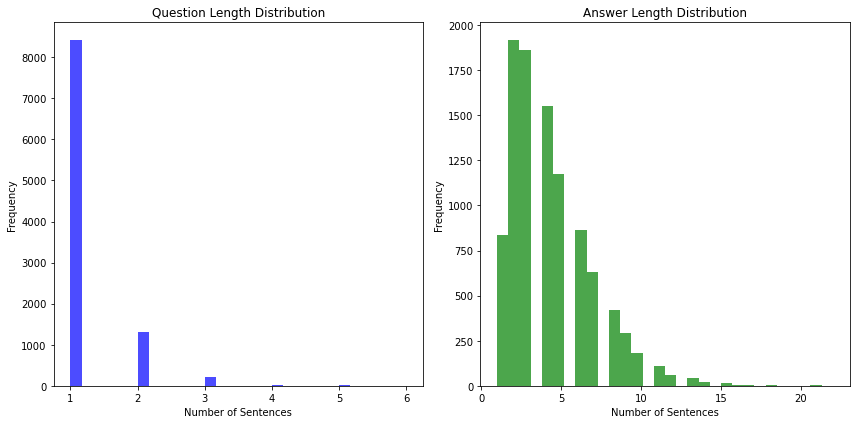

In [7]:
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is your loaded DatasetDict
# Example: dataset = DatasetDict.load_from_disk('path_to_your_dataset')

# Extract the first 1000 QA pairs
qa_pairs = dataset['train'].select(range(10000))

# Initialize lists to store lengths
question_lengths = []
answer_lengths = []

# Calculate sentence lengths for each QA pair
for pair in qa_pairs:
    question = pair['question']
    answer = pair['answer']
    
    # Count sentences in question and answer
    question_length = len(sent_tokenize(question))
    answer_length = len(sent_tokenize(answer))
    
    # Append lengths to lists
    question_lengths.append(question_length)
    answer_lengths.append(answer_length)

# Create a DataFrame for easier analysis
lengths_df = pd.DataFrame({
    'Question Length': question_lengths,
    'Answer Length': answer_lengths
})

# Save lengths to a CSV file (optional)
lengths_df.to_csv('qa_lengths.csv', index=False, encoding='utf-8')

# Visualization
plt.figure(figsize=(12, 6))

# Question lengths
plt.subplot(1, 2, 1)
plt.hist(question_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Question Length Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Answer lengths
plt.subplot(1, 2, 2)
plt.hist(answer_lengths, bins=30, color='green', alpha=0.7)
plt.title('Answer Length Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

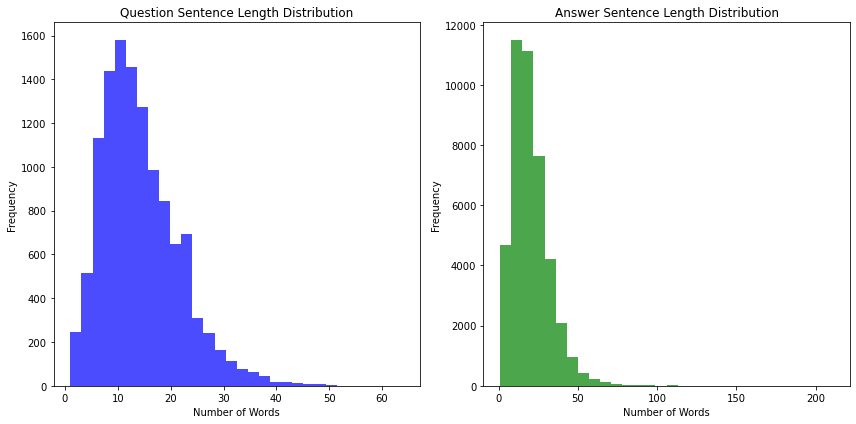

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is your loaded DatasetDict
# Extract the first 1000 QA pairs as a list of dictionaries
qa_pairs = dataset['train'].select(range(10000))

# Initialize lists to store lengths
question_sentence_lengths = []
answer_sentence_lengths = []

# Calculate sentence lengths for each QA pair
for pair in qa_pairs:
    # Extract question and answer
    question = pair['question']
    answer = pair['answer']
    
    # Tokenize sentences and calculate word counts for each sentence
    question_sentences = sent_tokenize(question)
    answer_sentences = sent_tokenize(answer)
    
    question_sentence_lengths.extend([len(word_tokenize(sentence)) for sentence in question_sentences])
    answer_sentence_lengths.extend([len(word_tokenize(sentence)) for sentence in answer_sentences])

# Visualize each distribution separately
plt.figure(figsize=(12, 6))

# Question sentence lengths
plt.subplot(1, 2, 1)
plt.hist(question_sentence_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Question Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Answer sentence lengths
plt.subplot(1, 2, 2)
plt.hist(answer_sentence_lengths, bins=30, color='green', alpha=0.7)
plt.title('Answer Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
df=pd.read_csv('QA_pairs_scoring_byfittedmodel3 (1).csv')
df

,question,answer_LLAMA,summary_bart,summary_llama,label_LLAMA,label_bart,label_llama
0,"Why is the ""Black Death"" mentioned so often in...",The Black Death is a very famous event in Euro...,"The ""Black Death"" originated in the Middle Eas...","The ""Black Death"" is a historical phenomenon t...",0,1,1
1,How historically accurate is the show The Last...,I've watched the first season of the show and ...,The Last Kingdom is a historical drama series ...,"The Last Kingdom, a historical drama series, i...",0,1,1
2,If there was a lack of food supply in the worl...,There's a lot of food out there. You just need...,Vitamins are crucial for various bodily functi...,Humans need a balanced diet that includes vari...,0,1,1
3,"If our DNA varies from person to person, how d...","Humans have 23 pairs of chromosomes, and each ...",The first step is to sequence the DNA of a hum...,Researchers compare human DNA to that of orang...,0,1,1
4,Why would a company spend millions on a long S...,"If you want to get a lot of attention, you wan...",Companies often spend millions on Super Bowl c...,Companies often spend millions on Super Bowl c...,0,1,1
...,...,...,...,...,...,...,...
95,The difference between a learning disability a...,"A learning disability is a learning disorder, ...",A learning disability is a neurological or psy...,Learning disabilities and intellectual disabil...,0,1,1
96,Why do I get headaches from 3D movies?,The reason why you get headaches from 3D movie...,There are several reasons why you might experi...,Watching 3D movies can cause headaches due to ...,0,1,0
97,Why do people have different skin colours?,Humans are a lot like plants. We have a lot of...,The skin color of a person is determined by th...,The skin color of a person is determined by th...,0,1,1
98,"How did girlscout cookies get to be so good, a...",The Girl Scouts have a strict recipe that they...,Girl Scout cookies have been a staple in the o...,The Girl Scout cookies have been a beloved tre...,0,1,1


In [6]:
df=df.iloc[:, 1:4]
df

,answer_LLAMA,summary_bart,summary_llama
0,The Black Death is a very famous event in Euro...,"The ""Black Death"" originated in the Middle Eas...","The ""Black Death"" is a historical phenomenon t..."
1,I've watched the first season of the show and ...,The Last Kingdom is a historical drama series ...,"The Last Kingdom, a historical drama series, i..."
2,There's a lot of food out there. You just need...,Vitamins are crucial for various bodily functi...,Humans need a balanced diet that includes vari...
3,"Humans have 23 pairs of chromosomes, and each ...",The first step is to sequence the DNA of a hum...,Researchers compare human DNA to that of orang...
4,"If you want to get a lot of attention, you wan...",Companies often spend millions on Super Bowl c...,Companies often spend millions on Super Bowl c...
...,...,...,...
95,"A learning disability is a learning disorder, ...",A learning disability is a neurological or psy...,Learning disabilities and intellectual disabil...
96,The reason why you get headaches from 3D movie...,There are several reasons why you might experi...,Watching 3D movies can cause headaches due to ...
97,Humans are a lot like plants. We have a lot of...,The skin color of a person is determined by th...,The skin color of a person is determined by th...
98,The Girl Scouts have a strict recipe that they...,Girl Scout cookies have been a staple in the o...,The Girl Scout cookies have been a beloved tre...


Average word count for answer_LLAMA: 208.08
Average word count for summary_bart: 59.57
Average word count for summary_llama: 90.73


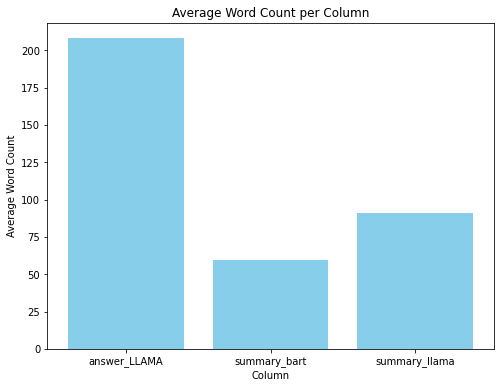

In [13]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

df['llama_word_count'] = df['answer_LLAMA'].apply(lambda x: len(word_tokenize(x)))
df['bart_word_count'] = df['summary_bart'].apply(lambda x: len(word_tokenize(x)))
df['llama_s_word_count'] = df['summary_llama'].apply(lambda x: len(word_tokenize(x)))

average_word_counts = {
    'answer_LLAMA': df['llama_word_count'].mean(),
    'summary_bart': df['bart_word_count'].mean(),
    'summary_llama': df['llama_s_word_count'].mean()
}

# Display average word counts
for column, avg_count in average_word_counts.items():
    print(f"Average word count for {column}: {avg_count:.2f}")

# Visualization
plt.figure(figsize=(8, 6))

# Bar chart for average word counts
plt.bar(average_word_counts.keys(), average_word_counts.values(), color='skyblue')

# Titles and labels
plt.title("Average Word Count per Column")
plt.xlabel("Column")
plt.ylabel("Average Word Count")
plt.show()

[nltk_data] Downloading package punkt to /home/xinmei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/xinmei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Words: 169209
Total Stop Words: 73226 (43.28%)


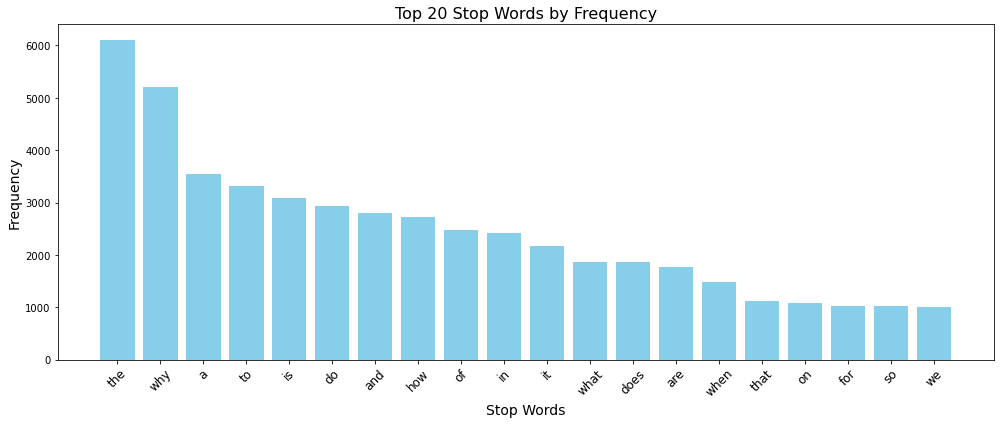

In [24]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset (example text list)
dataset = load_dataset("sentence-transformers/eli5")
dataset=dataset['train'].select(range(10000))['question']

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Flatten the dataset into a single list of tokens
all_words = [word.lower() for text in dataset for word in word_tokenize(text)]

# Count stop words
stop_word_counts = Counter(word for word in all_words if word in stop_words)

# Count total words and stop words
total_words = len(all_words)
total_stop_words = sum(stop_word_counts.values())
stop_word_percentage = (total_stop_words / total_words) * 100

print(f"Total Words: {total_words}")
print(f"Total Stop Words: {total_stop_words} ({stop_word_percentage:.2f}%)")

# Get the top 20 stop words
top_20_stop_words = stop_word_counts.most_common(20)


# Visualize the top 20 stop words
plt.figure(figsize=(14, 6))
words, counts = zip(*top_20_stop_words)
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Stop Words by Frequency", fontsize=16)  # Larger title font
plt.xlabel("Stop Words", fontsize=14)  # Larger x-axis label font
plt.ylabel("Frequency", fontsize=14)  # Larger y-axis label font
plt.xticks(rotation=45, fontsize=12)  # Rotate and enlarge x-axis labels
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


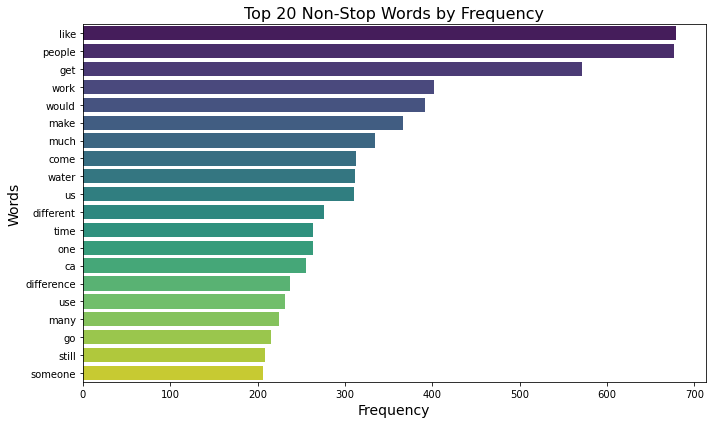

In [28]:
import seaborn as sns
dataset = load_dataset("sentence-transformers/eli5")
dataset=dataset['train'].select(range(10000))['question']
stop_words = set(stopwords.words('english'))

# Flatten the dataset into a single list of tokens
all_words = [word.lower() for text in dataset for word in word_tokenize(text)]

# Filter out stop words
non_stop_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Count non-stop words
non_stop_word_counts = Counter(non_stop_words)

# Get the top 20 non-stop words
top_20_non_stop_words = non_stop_word_counts.most_common(20)

# Convert to a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(top_20_non_stop_words, columns=["Word", "Frequency"])

# Visualize with Seaborn
plt.figure(figsize=(10, 6))  # Adjust size
sns.barplot(x="Frequency", y="Word", data=df, palette="viridis")
plt.title("Top 20 Non-Stop Words by Frequency", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.tight_layout()
plt.show()

In [2]:
import gensim

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import pyLDAvis.gensim_models
import nltk

# Ensure NLTK data is available

dataset = load_dataset("sentence-transformers/eli5")
dataset=dataset['train'].select(range(10000))['question']

# Preprocessing: Tokenization and stop word removal
stop_words = set(stopwords.words('english'))
processed_docs = [
    [word.lower() for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words]
    for doc in dataset
]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Visualize topics using pyLDAvis
pyLDAvis.enable_notebook()  # For Jupyter Notebook
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')  # Save visualization to file
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.018534  0.040808       1        1  21.387601
2     -0.033465  0.024133       2        1  20.934577
4      0.045856 -0.222448       3        1  20.522089
1     -0.178762  0.047735       4        1  19.622086
3      0.184906  0.109773       5        1  17.533647, topic_info=          Term        Freq       Total Category  logprob  loglift
46       water  255.000000  255.000000  Default  30.0000  30.0000
359       food  114.000000  114.000000  Default  29.0000  29.0000
657    exactly  127.000000  127.000000  Default  28.0000  28.0000
14   different  234.000000  234.000000  Default  27.0000  27.0000
507      earth   87.000000   87.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
139       work   42.241448  333.670509   Topic5  -5.7012  -0.3257
646       much   36.093393  290.292908   Topic5  -5.8585  -0.3437
79        like   38.595811  581.408762   Topic5  -5.7914  -0.9713
245      would   35.294109  348.166432   Topic5  -5.8809  -0.5479
135        one   33.845331  219.470415   Topic5  -5.9228  -0.1284

[353 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
339       1  0.402139      able
339       2  0.082490      able
339       3  0.381516      able
339       4  0.134046      able
601       5  0.984881  accurate
...     ...       ...       ...
656       1  0.014008      year
656       2  0.266150      year
656       4  0.714403      year
151       1  0.235396     years
151       4  0.759686     years

[559 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])